In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [3]:
os.chdir("C:\\Users\\usuario\\Documents\\Data_science\\Data")
os.getcwd()

'C:\\Users\\usuario\\Documents\\Data_science\\Data'

In [4]:
data=pd.read_csv("01dataBaseTrainTrxRec.csv")
perfil=pd.read_csv("02dataBasePerfilRec.csv")
X_test_key_rec=pd.read_csv("05dataBaseTestKeyRec.csv")

In [5]:
perfil_dummies=pd.get_dummies(perfil)

In [6]:
data_1=data.merge(perfil_dummies, on="codCliente")

### Partimos en Train y Test

In [7]:
X_train, X_test=train_test_split(data_1, test_size=0.2)

In [8]:
perfil_Estab=X_train[["codEstab", "flagLimaProvEstab", "codGiro", "ubigeoEstab"]]
perfil_Estab=perfil_Estab.drop_duplicates().sort_values(by="codEstab")

In [20]:
resumen={"ratingMonto":"mean"}
cliente_estab=X_train.groupby(by=["codCliente", "codEstab"], as_index=False).agg(resumen)
cliente_estab.columns=["codCliente", "codEstab", "mean_ratingMonto_cliente_estab"]

In [28]:
resumen={"ratingMonto":"mean"}
cliente_codgiro=X_train.groupby(by=["codCliente", "codGiro"], as_index=False).agg(resumen)
cliente_codgiro.columns=["codCliente", "codGiro", "mean_ratingMonto_cliente_codgiro"]

In [31]:
resumen={"ratingMonto":"mean"}
cliente_ubigeo=X_train.groupby(by=["codCliente", "ubigeoEstab"], as_index=False).agg(resumen)
cliente_ubigeo.columns=["codCliente", "ubigeoEstab", "mean_ratingMonto_cliente_ubigeo"]

In [24]:
resumen={"ratingMonto":"mean"}
codgiro_ubigeo=X_train.groupby(by=["codGiro", "ubigeoEstab"], as_index=False).agg(resumen)
codgiro_ubigeo.columns=["codGiro", "ubigeoEstab", "mean_ratingMonto_codgiro_ubigeo"]

In [26]:
df_1=X_train.merge(cliente_estab, on=["codCliente", "codEstab"], how="left")

In [29]:
df_2=df_1.merge(cliente_codgiro, on=["codCliente", "codGiro"], how="left")

In [32]:
df_3=df_2.merge(cliente_ubigeo, on=["codCliente", "ubigeoEstab"], how="left")

In [33]:
df_4=df_3.merge(codgiro_ubigeo, on=["codGiro", "ubigeoEstab"], how="left")

In [48]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273293 entries, 0 to 1273292
Data columns (total 61 columns):
fechaOper                           1273293 non-null object
codCliente                          1273293 non-null int64
codGiro                             1198970 non-null float64
codEstab                            1273293 non-null int64
flagLimaProvEstab                   1273293 non-null int64
ubigeoEstab                         1198970 non-null float64
ctdTrx                              1273293 non-null int64
ratingMonto                         1273293 non-null float64
flagGenero                          1273293 non-null int64
flagLimaProvCliente                 1273293 non-null int64
ubigeoCliente                       1272849 non-null float64
flagBxi                             1273293 non-null int64
rangoEdad_Rango1                    1273293 non-null uint8
rangoEdad_Rango2                    1273293 non-null uint8
rangoEdad_Rango3                    1273293 non-null

In [37]:
variables_indep=['mean_ratingMonto_cliente_estab', 'mean_ratingMonto_cliente_codgiro',
       'mean_ratingMonto_cliente_ubigeo', 'mean_ratingMonto_codgiro_ubigeo']
data_train=df_4[variables_indep]
y_train=df_4["ratingMonto"]

In [43]:
xgb_model=xgb.XGBRegressor(n_jobs=-1,n_estimators=10,subsample=0.75,max_depth=20, silent=False)

In [44]:
xgb_model.fit(data_train, y_train)

[17:42:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=11
[17:42:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[17:42:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[17:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=14
[17:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=11
[17:42:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=11
[17:42:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.75)

In [45]:
y_p_train=xgb_model.predict(data_train)

In [49]:
print('RSME',math.sqrt(mean_squared_error(y_train, df_4.mean_ratingMonto_cliente_estab)))

RSME 0.009354553171469764


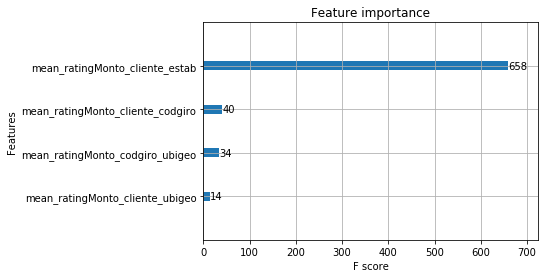

In [47]:
xgb.plot_importance(xgb_model, max_num_features=15)

### Test

In [50]:
df_1_test=X_test.merge(cliente_estab, on=["codCliente", "codEstab"], how="left")

In [51]:
df_2_test=df_1_test.merge(cliente_codgiro, on=["codCliente", "codGiro"], how="left")

In [52]:
df_3_test=df_2_test.merge(cliente_ubigeo, on=["codCliente", "ubigeoEstab"], how="left")

In [53]:
df_4_test=df_3_test.merge(codgiro_ubigeo, on=["codGiro", "ubigeoEstab"], how="left")

In [55]:
data_test=df_4_test[variables_indep]
y_test=df_4_test["ratingMonto"]

In [63]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318324 entries, 0 to 318323
Data columns (total 4 columns):
mean_ratingMonto_cliente_estab      173038 non-null float64
mean_ratingMonto_cliente_codgiro    265100 non-null float64
mean_ratingMonto_cliente_ubigeo     279455 non-null float64
mean_ratingMonto_codgiro_ubigeo     299710 non-null float64
dtypes: float64(4)
memory usage: 22.1 MB


In [59]:
resumen={"ratingMonto":"mean"}
perfil_cliente=X_train.groupby(by=["codCliente"], as_index=False).agg(resumen)
perfil_cliente.columns=["codCliente", "mean_ratingMonto_cliente"]

In [60]:
df_4_test=df_4_test.merge(perfil_cliente, on="codCliente", how="left")

In [64]:
df_4_test["y_p_test"]=df_4.ratingMonto.mean()
df_4_test.y_p_test=np.where(~ np.isnan(df_4_test.codCliente), df_4_test.mean_ratingMonto_cliente, df_4_test.y_p_test)
df_4_test.y_p_test=np.where(~ np.isnan(df_4_test.mean_ratingMonto_codgiro_ubigeo), df_4_test.mean_ratingMonto_codgiro_ubigeo, df_4_test.y_p_test )
df_4_test.y_p_test=np.where(~ np.isnan(df_4_test.mean_ratingMonto_cliente_ubigeo), df_4_test.mean_ratingMonto_cliente_ubigeo, df_4_test.y_p_test )
df_4_test.y_p_test=np.where(~ np.isnan(df_4_test.mean_ratingMonto_cliente_codgiro), df_4_test.mean_ratingMonto_cliente_codgiro, df_4_test.y_p_test )
df_4_test.y_p_test=np.where(~ np.isnan(df_4_test.mean_ratingMonto_cliente_estab), df_4_test.mean_ratingMonto_cliente_estab, df_4_test.y_p_test )

In [57]:
y_p_test=xgb_model.predict(data_test)

In [65]:
print('RSME',math.sqrt(mean_squared_error(y_test, df_4_test.y_p_test)))

RSME 0.030911972860579607


### Base para someter

In [66]:
data_test_rec_key=X_test_key_rec.merge(perfil_dummies, on="codCliente")
data_test_rec_key=data_test_rec_key.merge(perfil_Estab, on="codEstab", how="left")

In [67]:
df_1_sumision=data_test_rec_key.merge(cliente_estab, on=["codCliente", "codEstab"], how="left")

In [68]:
df_2_sumision=df_1_sumision.merge(cliente_codgiro, on=["codCliente", "codGiro"], how="left")

In [69]:
df_3_sumision=df_2_sumision.merge(cliente_ubigeo, on=["codCliente", "ubigeoEstab"], how="left")

In [70]:
df_4_sumision=df_3_sumision.merge(codgiro_ubigeo, on=["codGiro", "ubigeoEstab"], how="left")

In [71]:
df_4_sumision=df_4_sumision.merge(perfil_cliente, on="codCliente", how="left")

In [73]:
df_4_sumision["y_p_sumision"]=df_4.ratingMonto.mean()
df_4_sumision.y_p_sumision=np.where(~ np.isnan(df_4_sumision.codCliente), df_4_sumision.mean_ratingMonto_cliente, df_4_sumision.y_p_sumision)
df_4_sumision.y_p_sumision=np.where(~ np.isnan(df_4_sumision.mean_ratingMonto_codgiro_ubigeo), df_4_sumision.mean_ratingMonto_codgiro_ubigeo, df_4_sumision.y_p_sumision )
df_4_sumision.y_p_sumision=np.where(~ np.isnan(df_4_sumision.mean_ratingMonto_cliente_ubigeo), df_4_sumision.mean_ratingMonto_cliente_ubigeo, df_4_sumision.y_p_sumision )
df_4_sumision.y_p_sumision=np.where(~ np.isnan(df_4_sumision.mean_ratingMonto_cliente_codgiro), df_4_sumision.mean_ratingMonto_cliente_codgiro, df_4_sumision.y_p_sumision )
df_4_sumision.y_p_sumision=np.where(~ np.isnan(df_4_sumision.mean_ratingMonto_cliente_estab), df_4_sumision.mean_ratingMonto_cliente_estab, df_4_sumision.y_p_sumision )

In [74]:
df_4_sumision["codClientecodEstab"]=df_4_sumision.codCliente.map(str)+df_4_sumision.codEstab.map(str)

In [75]:
submission=df_4_sumision[["codClientecodEstab"]]
submission["ratingMonto"]=df_4_sumision.y_p_sumision

C:\Users\usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
submission[0:10]

,codClientecodEstab,ratingMonto
0,118268644,0.016660
1,118231068,0.014726
2,11824288,0.004424
3,118215803,0.010471
4,118241883,0.006921
5,11822853,0.020731
6,11828499,0.012809
7,118245311,0.015582
8,118220826,0.010113
9,118224544,0.013507


In [77]:
submission.to_csv("submission.csv", header=True, index=False)

In [138]:
len(submission)

467203

In [20]:
media_cliente=data.groupby(by="codCliente", as_index=False).agg({"ratingMonto":"mean"})
media_cliente.columns=["codCliente", "mean_ratingMonto"]

In [21]:
media_cliente.head()

,codCliente,mean_ratingMonto
0,1,0.023983
1,2,0.004545
2,3,0.044798
3,4,0.004280
4,5,0.015152


In [22]:
data_1=data.merge(media_cliente, on="codCliente")

In [27]:
data_1["ratingMonto_centrado"]=data_1["ratingMonto"]-data_1["mean_ratingMonto"]

In [31]:
data_1["ratingMonto_escalado"]=data_1["ratingMonto"]/data_1["mean_ratingMonto"]

In [33]:
data_1[data_1.codCliente==1]

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,mean_ratingMonto,ratingMonto_centrado,ratingMonto_escalado
1117172,2017-05-24 00:00:00,1,105.0,39,1,147.0,1,0.084590,0.023983,0.060606,3.527011
1117173,2017-05-21 00:00:00,1,110.0,29255,1,147.0,1,0.010616,0.023983,-0.013367,0.442642
1117174,2017-03-12 00:00:00,1,110.0,29255,1,147.0,1,0.009938,0.023983,-0.014045,0.414388
1117175,2017-03-20 00:00:00,1,NaN,6314,0,NaN,1,0.004969,0.023983,-0.019014,0.207194
1117176,2017-04-06 00:00:00,1,NaN,6314,0,NaN,1,0.004800,0.023983,-0.019184,0.200131
1117177,2017-07-17 00:00:00,1,85.0,44974,0,293.0,1,0.006607,0.023983,-0.017377,0.275474
1117178,2016-12-31 00:00:00,1,75.0,4311,1,145.0,1,0.008188,0.023983,-0.015795,0.341400
1117179,2017-08-26 00:00:00,1,50.0,3843,1,170.0,1,0.056412,0.023983,0.032429,2.352126
1117180,2017-01-14 00:00:00,1,127.0,81333,1,157.0,1,0.014682,0.023983,-0.009302,0.612165
1117181,2017-02-05 00:00:00,1,110.0,29255,1,147.0,1,0.014682,0.023983,-0.009302,0.612165


In [18]:
data[data.codCliente==2]

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
10778,2017-02-05 00:00:00,2,210.0,8273,1,148.0,1,0.013170
33378,2017-01-20 00:00:00,2,114.0,18550,1,156.0,1,0.002016
38801,2017-08-28 00:00:00,2,114.0,18550,1,156.0,1,0.001176
49171,2017-06-08 00:00:00,2,114.0,18550,1,156.0,1,0.001545
82009,2017-01-20 00:00:00,2,114.0,17717,1,156.0,1,0.000538
91702,2017-02-13 00:00:00,2,210.0,8273,1,148.0,1,0.001646
111016,2017-09-29 00:00:00,2,114.0,19340,1,148.0,1,0.013271
156392,2017-09-24 00:00:00,2,110.0,1751,1,156.0,1,0.009911
176418,2017-06-27 00:00:00,2,110.0,82096,1,150.0,1,0.001680
177992,2016-12-18 00:00:00,2,110.0,49456,1,172.0,1,0.000773
